In [53]:
#!/usr/bin/env python3
###-----------------------------------------------------------##
#@author narumeena
#@description -applying bayesian optimization on random forest 
#             -using hyperopt library 
###-----------------------------------------------------------##

In [54]:
#import libraries 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from sklearn.model_selection import train_test_split # split the dataset into traninig and testing dataset 

from sklearn.ensemble.forest import RandomForestClassifier# to import the random forest Model 
from sklearn.metrics import roc_curve, auc                # to import roc curve abd auc metrics for evaluation 
#from sklearn.grid_search import GridSearchCV              # grid search is used for hyperparameters-optimization
from sklearn.model_selection import KFold                # cross validation using the kfold algorithm
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials     # library for hyperparameters-optimization
from sklearn.model_selection import cross_val_score

import seaborn as sns                                     # Python graphing library
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
#import data from filterd dataset with maximum 30% files 
filtredAttributes = pd.read_csv("../analysis/trainingDataSet/case_control_filtred.csv", sep=",")
filtredAttributes.shape

(138665, 74)

In [56]:
filtredAttributes.head()

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_STOP_LOST,Consequence_SYNONYMOUS,Consequence_UPSTREAM
0,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,0,0,1,0,0,0
1,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,1,0,0,0,0,0
2,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,1,0,0,0,0,0,0
3,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,0,0,0,0,0,0,1
4,0.675,0.213,814,1969,0.192,0.999,1.0,-1.149,0.850,3.250,...,0,0,0,1,0,0,0,0,0,0


In [57]:
pd.options.display.max_rows = 4000
filtredAttributes.isnull().sum()

GC                                  0
CpG                                 0
minDistTSS                          0
minDistTSE                          0
priPhCons                         143
mamPhCons                         143
verPhCons                         143
priPhyloP                         143
mamPhyloP                         143
verPhyloP                         143
bStatistic                       1058
cHmm_E1                             0
cHmm_E2                             0
cHmm_E3                             0
cHmm_E4                             0
cHmm_E5                             0
cHmm_E6                             0
cHmm_E7                             0
cHmm_E8                             0
cHmm_E9                             0
cHmm_E10                            0
cHmm_E11                            0
cHmm_E12                            0
cHmm_E13                            0
cHmm_E14                            0
cHmm_E15                            0
cHmm_E16    

In [58]:
#missing values 

filtredAttributes['priPhCons'].fillna(0.115,inplace=True)
filtredAttributes['mamPhCons'].fillna(0.079,inplace=True)
filtredAttributes['verPhCons'].fillna(0.094,inplace=True)
filtredAttributes['priPhyloP'].fillna(-0.033,inplace=True)
filtredAttributes['mamPhyloP'].fillna(-0.038,inplace=True)
filtredAttributes['verPhyloP'].fillna(0.017,inplace=True)
filtredAttributes['bStatistic'].fillna(800.261,inplace=True)
filtredAttributes['minDistTSS'].fillna(10000000,inplace=True)
filtredAttributes['minDistTSE'].fillna(10000000,inplace=True)
filtredAttributes['RemapOverlapTF'].fillna(0.5,inplace=True)
filtredAttributes['EncodeH3K4me1-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K4me2-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K4me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K9ac-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K9me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K27ac-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K27me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K36me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K79me2-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH4K20me1-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH2AFZ-max'].fillna(0,inplace=True)
filtredAttributes['EncodetotalRNA-max'].fillna(0,inplace=True)
filtredAttributes['EncodeDNase-max'].fillna(0,inplace=True)

In [59]:
pd.options.display.max_rows = 4000
filtredAttributes.isnull().sum()

GC                              0
CpG                             0
minDistTSS                      0
minDistTSE                      0
priPhCons                       0
mamPhCons                       0
verPhCons                       0
priPhyloP                       0
mamPhyloP                       0
verPhyloP                       0
bStatistic                      0
cHmm_E1                         0
cHmm_E2                         0
cHmm_E3                         0
cHmm_E4                         0
cHmm_E5                         0
cHmm_E6                         0
cHmm_E7                         0
cHmm_E8                         0
cHmm_E9                         0
cHmm_E10                        0
cHmm_E11                        0
cHmm_E12                        0
cHmm_E13                        0
cHmm_E14                        0
cHmm_E15                        0
cHmm_E16                        0
cHmm_E17                        0
cHmm_E18                        0
cHmm_E19      

In [60]:
# One-hot encode the data using pandas get_dummies
filtredAttributes = pd.get_dummies(filtredAttributes)

In [61]:
# Labels are the values we want to predict
labels = filtredAttributes['category']
labels

0         1
1         1
2         1
3         1
4         1
         ..
138660    0
138661    0
138662    0
138663    0
138664    0
Name: category, Length: 138665, dtype: int64

In [30]:
# Remove the labels from the features
# axis 1 refers to the columns
features= filtredAttributes.drop('category', axis = 1)
features.head()

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_STOP_LOST,Consequence_SYNONYMOUS,Consequence_UPSTREAM
0,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,0,0,1,0,0,0
1,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,1,0,0,0,0,0
2,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,1,0,0,0,0,0,0
3,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,0,0,0,0,0,0,1
4,0.675,0.213,814,1969,0.192,0.999,1.0,-1.149,0.850,3.250,...,0,0,0,1,0,0,0,0,0,0


In [31]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.25, random_state = 100)

In [32]:
X_train

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_STOP_LOST,Consequence_SYNONYMOUS,Consequence_UPSTREAM
42192,0.596,0.067,20,10,0.980,0.985,1.000,0.595,2.963,7.708,...,0,0,0,0,0,0,0,0,0,1
46590,0.391,0.013,1915,1832,0.963,1.000,1.000,0.475,3.370,8.687,...,0,0,0,1,0,0,0,0,0,0
78842,0.483,0.013,110247,414677,0.002,0.000,0.000,0.418,-0.820,-0.780,...,0,1,0,0,0,0,0,0,0,0
48882,0.464,0.053,952,306,0.979,0.998,1.000,0.595,1.325,4.270,...,0,0,0,0,0,0,0,0,0,1
33305,0.636,0.027,285,450,0.954,1.000,1.000,0.595,4.396,8.427,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,0.384,0.000,33269,92255,0.032,0.000,0.000,0.475,-0.733,-0.731,...,0,1,0,0,0,0,0,0,0,0
65615,0.464,0.013,22224,17929,0.000,0.000,0.000,-0.393,-1.784,-1.712,...,0,1,0,0,0,0,0,0,0,0
77655,0.424,0.013,2194,687,0.112,0.957,0.998,-1.347,0.129,0.894,...,0,0,0,0,0,0,0,0,0,1
56088,0.530,0.053,669,90,0.212,0.376,1.000,0.391,2.680,7.282,...,0,1,0,0,0,0,0,0,0,0


In [33]:
Y_train

42192    1
46590    1
78842    0
48882    1
33305    1
        ..
82270    0
65615    0
77655    0
56088    1
38408    1
Name: category, Length: 103998, dtype: int64

In [34]:
#Function for model performance using AUC
def performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Random Forest without hyper parameter optimisation



In [15]:
rf0=RandomForestClassifier()

In [16]:
rf0.fit(X=X_train,y=Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

the AUC is : 0.9994


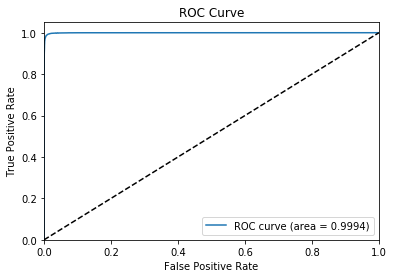

In [17]:
performance(Model=rf0,Y=Y_test,X=X_test)

# Random Forest using hyperopt

In [18]:
def acc_model(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_train, Y_train).mean()

param_space = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(0,150)),
    'n_estimators': hp.choice('n_estimators', range(100,500)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                              
0                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 81, 'n_estimators': 405}
  1%|          | 1/100 [00:01<01:39,  1.00s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                         
0                                                                 
{'criterion': 'gini', 'max_depth': 7, 'max_features': 102, 'n_estimators': 496}
  2%|▏         | 2/100 [00:02<01:40,  1.03s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                         
0                                                                 
{'criterion': 'gini', 'max_depth': 2, 'max_features': 131, 'n_estimators': 282}
  3%|▎         | 3/100 [00:02<01:30,  1.07trial/s, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                         
0.9875766808315489                                                
{'criterion': 'gini', 'max_depth': 19, 'max_features': 13, 'n_estimators': 405}
new best:                                                            
0.9875766808315489                                                   
{'criterion': 'gini', 'max_depth': 3, 'max_features': 63, 'n_estimators': 127}
  5%|▌         | 5/100 [15:13<5:30:41, 208.86s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                            
0.9875766808315489                                                   
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 142, 'n_estimators': 322}
  6%|▌         | 6/100 [15:14<3:49:25, 146.44s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                            
0.9875766808315489                                                   
{'criterion': 'gini', 'max_depth': 17, 'max_features': 94, 'n_estimators': 222}
  7%|▋         | 7/100 [15:15<2:39:09, 102.69s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                            
0.9875766808315489                                                   
{'criterion': 'gini', 'max_depth': 11, 'max_features': 18, 'n_estimators': 129}
new best:                                                            
0.9875766808315489                                                   
{'criterion': 'gini', 'max_depth': 1, 'max_features': 70, 'n_estimators': 139}
  9%|▉         | 9/100 [19:57<2:56:48, 116.58s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                            
0.9875766808315489                                                   
{'criterion': 'gini', 'max_depth': 12, 'max_features': 107, 'n_estimators': 296}
 10%|█         | 10/100 [19:57<2:02:43, 81.81s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                            
0.9875766808315489                                                   
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 102, 'n_estimators': 491}
 11%|█         | 11/100 [19:58<1:25:27, 57.62s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                            
0.9875766808315489                                                   
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 126, 'n_estimators': 125}
 12%|█▏        | 12/100 [19:59<59:21, 40.47s/trial, best loss: nan]  

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                          
0.9875766808315489                                                 
{'criterion': 'gini', 'max_depth': 2, 'max_features': 145, 'n_estimators': 476}
 13%|█▎        | 13/100 [20:00<41:30, 28.63s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                          
0.9887401640981259                                                 
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 21, 'n_estimators': 349}
new best:                                                             
0.9887401640981259                                                    
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 55, 'n_estimators': 477}
 15%|█▌        | 15/100 [36:43<5:48:23, 245.92s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                             
0.9887401640981259                                                    
{'criterion': 'gini', 'max_depth': 8, 'max_features': 107, 'n_estimators': 213}
 16%|█▌        | 16/100 [36:44<4:01:15, 172.33s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                             
0.9887401640981259                                                    
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 92, 'n_estimators': 189}
 17%|█▋        | 17/100 [36:44<2:47:06, 120.80s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                             
0.9887401640981259                                                    
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 60, 'n_estimators': 406}
 18%|█▊        | 18/100 [50:57<7:45:00, 340.25s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                             
0.9887401640981259                                                    
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 127, 'n_estimators': 152}
 19%|█▉        | 19/100 [50:57<5:21:46, 238.36s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                             
0.9887401640981259                                                    
{'criterion': 'gini', 'max_depth': 13, 'max_features': 106, 'n_estimators': 238}
 20%|██        | 20/100 [50:58<3:42:42, 167.03s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                             
0.9887401640981259                                                    
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 29, 'n_estimators': 178}
new best:                                                             
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 24, 'n_estimators': 258}
 22%|██▏       | 22/100 [1:05:48<7:00:29, 323.45s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 99, 'n_estimators': 282}
 23%|██▎       | 23/100 [1:05:48<4:50:49, 226.62s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 7, 'max_features': 106, 'n_estimators': 365}
 24%|██▍       | 24/100 [1:05:49<3:21:16, 158.90s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 10, 'max_features': 96, 'n_estimators': 226}
 25%|██▌       | 25/100 [1:05:50<2:19:15, 111.41s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 16, 'max_features': 102, 'n_estimators': 174}
 26%|██▌       | 26/100 [1:05:50<1:36:22, 78.14s/trial, best loss: nan] 

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                              
0.9887401640981259                                                     
{'criterion': 'gini', 'max_depth': 7, 'max_features': 92, 'n_estimators': 430}
 27%|██▋       | 27/100 [1:05:51<1:06:52, 54.97s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                              
0.9887401640981259                                                     
{'criterion': 'gini', 'max_depth': 2, 'max_features': 37, 'n_estimators': 159}
 28%|██▊       | 28/100 [1:07:29<1:21:26, 67.87s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                              
0.9887401640981259                                                     
{'criterion': 'gini', 'max_depth': 6, 'max_features': 74, 'n_estimators': 436}
 29%|██▉       | 29/100 [1:07:30<56:34, 47.81s/trial, best loss: nan]  

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                            
0.9887401640981259                                                   
{'criterion': 'gini', 'max_depth': 16, 'max_features': 104, 'n_estimators': 392}
 30%|███       | 30/100 [1:07:31<39:20, 33.72s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                            
0.9887401640981259                                                   
{'criterion': 'gini', 'max_depth': 7, 'max_features': 87, 'n_estimators': 356}
 31%|███       | 31/100 [1:07:32<27:25, 23.84s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                            
0.9887401640981259                                                   
{'criterion': 'gini', 'max_depth': 12, 'max_features': 103, 'n_estimators': 367}
 32%|███▏      | 32/100 [1:07:33<19:11, 16.93s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                            
0.9887401640981259                                                   
{'criterion': 'gini', 'max_depth': 13, 'max_features': 69, 'n_estimators': 348}
new best:                                                                
0.9887401640981259                                                       
{'criterion': 'gini', 'max_depth': 14, 'max_features': 54, 'n_estimators': 301}
 34%|███▍      | 34/100 [2:16:02<18:49:29, 1026.81s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                                 
0.9887401640981259                                                        
{'criterion': 'gini', 'max_depth': 16, 'max_features': 79, 'n_estimators': 132}
 35%|███▌      | 35/100 [2:16:03<12:58:49, 718.91s/trial, best loss: nan] 

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                                
0.9887401640981259                                                       
{'criterion': 'gini', 'max_depth': 8, 'max_features': 47, 'n_estimators': 233}
new best:                                                                
0.9887401640981259                                                       
{'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'n_estimators': 201}
 37%|███▋      | 37/100 [2:28:19<8:57:05, 511.52s/trial, best loss: nan] 

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 92, 'n_estimators': 212}
 38%|███▊      | 38/100 [2:28:20<6:10:12, 358.27s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 5, 'max_features': 123, 'n_estimators': 214}
 39%|███▉      | 39/100 [2:28:21<4:15:08, 250.97s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 5, 'max_features': 134, 'n_estimators': 123}
 40%|████      | 40/100 [2:28:21<2:55:48, 175.82s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 27, 'n_estimators': 133}
 41%|████      | 41/100 [2:34:10<3:43:51, 227.65s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 149, 'n_estimators': 432}
 42%|████▏     | 42/100 [2:34:10<2:34:18, 159.63s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 17, 'max_features': 61, 'n_estimators': 347}
 43%|████▎     | 43/100 [3:18:37<14:26:07, 911.72s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                                
0.9887401640981259                                                       
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 88, 'n_estimators': 306}
 44%|████▍     | 44/100 [3:18:38<9:55:51, 638.43s/trial, best loss: nan] 

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 36, 'n_estimators': 268}
 45%|████▌     | 45/100 [3:30:06<9:58:51, 653.30s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 8, 'max_features': 82, 'n_estimators': 346}
 46%|████▌     | 46/100 [3:30:07<6:51:47, 457.54s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 17, 'max_features': 20, 'n_estimators': 272}
 47%|████▋     | 47/100 [3:39:32<7:12:40, 489.82s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 5, 'max_features': 109, 'n_estimators': 116}
 48%|████▊     | 48/100 [3:39:32<4:57:16, 343.02s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 72, 'n_estimators': 319}
 49%|████▉     | 49/100 [3:49:25<5:55:09, 417.84s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 142, 'n_estimators': 241}
 50%|█████     | 50/100 [3:49:25<4:03:53, 292.67s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 17, 'max_features': 67, 'n_estimators': 239}
new best:                                                                
0.9887401640981259                                                       
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 1, 'n_estimators': 135}
 52%|█████▏    | 52/100 [4:23:40<7:42:29, 578.12s/trial, best loss: nan] 

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 98, 'n_estimators': 189}
 53%|█████▎    | 53/100 [4:23:40<5:17:07, 404.85s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 88, 'n_estimators': 441}
 54%|█████▍    | 54/100 [4:23:41<3:37:28, 283.67s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 132, 'n_estimators': 272}
 55%|█████▌    | 55/100 [4:23:42<2:29:04, 198.77s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 146, 'n_estimators': 349}
 56%|█████▌    | 56/100 [4:23:43<1:42:12, 139.37s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 21, 'n_estimators': 166}
new best:                                                               
0.9888267067203674                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 21, 'n_estimators': 166}
new best:                                                               
0.9888267067203674                                                      
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 2, 'n_estimators': 252}
new best:                                                               
0.989230560271019                                                       
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 33, 'n_estimators': 185}
new best:                                                               
0.9892305602

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                                
0.989230560271019                                                        
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 124, 'n_estimators': 308}
 63%|██████▎   | 63/100 [5:45:17<6:56:20, 675.16s/trial, best loss: nan] 

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.989230560271019                                                       
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 46, 'n_estimators': 152}
new best:                                                               
0.989230560271019                                                       
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'n_estimators': 379}
new best:                                                               
0.9897017312222852                                                      
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 68, 'n_estimators': 164}
new best:                                                               
0.9897017312222852                                                      
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 12, 'n_estimators': 185}
new best:                                                               
0.989701731

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9897017312222852                                                      
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 143, 'n_estimators': 491}
 70%|███████   | 70/100 [7:01:38<4:32:58, 545.95s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9897017312222852                                                      
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 78, 'n_estimators': 101}
 71%|███████   | 71/100 [7:01:38<3:04:46, 382.29s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 68, 'n_estimators': 299}
new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 68, 'n_estimators': 367}
 73%|███████▎  | 73/100 [8:13:39<9:49:03, 1309.02s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                                
0.9898459619915159                                                       
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 101, 'n_estimators': 299}
 74%|███████▍  | 74/100 [8:13:40<6:37:10, 916.55s/trial, best loss: nan] 

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 68, 'n_estimators': 428}
new best:                                                                
0.9898459619915159                                                       
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 51, 'n_estimators': 251}
 76%|███████▌  | 76/100 [9:17:53<9:07:46, 1369.43s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                                
0.9898459619915159                                                       
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 92, 'n_estimators': 385}
 77%|███████▋  | 77/100 [9:17:54<6:07:33, 958.85s/trial, best loss: nan] 

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 28, 'n_estimators': 285}
 78%|███████▊  | 78/100 [9:31:21<5:34:56, 913.46s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 132, 'n_estimators': 367}
 79%|███████▉  | 79/100 [9:31:22<3:43:53, 639.69s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 139, 'n_estimators': 396}
 80%|████████  | 80/100 [9:31:23<2:29:20, 448.03s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 131, 'n_estimators': 367}
 81%|████████  | 81/100 [9:31:24<1:39:23, 313.86s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 80, 'n_estimators': 271}
 82%|████████▏ | 82/100 [9:31:24<1:05:58, 219.90s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 146, 'n_estimators': 214}
 83%|████████▎ | 83/100 [9:31:25<43:39, 154.10s/trial, best loss: nan]  

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                             
0.9898459619915159                                                    
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 23, 'n_estimators': 276}
new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 44, 'n_estimators': 399}
new best:                                                               
0.9898459619915159                                                      
{'criterion': 'gini', 'max_depth': 4, 'max_features': 7, 'n_estimators': 409}
new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 6, 'n_estimators': 453}
 87%|████████▋ | 87/100 [9:59:16<58:33, 270.26s/trial, best loss: nan]  

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                             
0.9898459619915159                                                    
{'criterion': 'gini', 'max_depth': 2, 'max_features': 119, 'n_estimators': 275}
 88%|████████▊ | 88/100 [9:59:17<37:52, 189.39s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                             
0.9898459619915159                                                    
{'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'n_estimators': 367}
 89%|████████▉ | 89/100 [9:59:51<26:09, 142.69s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                             
0.9898459619915159                                                    
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 131, 'n_estimators': 419}
 90%|█████████ | 90/100 [9:59:52<16:41, 100.16s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                             
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 56, 'n_estimators': 195}
 91%|█████████ | 91/100 [10:17:17<57:34, 383.79s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                              
0.9898459619915159                                                     
{'criterion': 'gini', 'max_depth': 14, 'max_features': 93, 'n_estimators': 299}
 92%|█████████▏| 92/100 [10:17:18<35:50, 268.86s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                              
0.9898459619915159                                                     
{'criterion': 'gini', 'max_depth': 5, 'max_features': 71, 'n_estimators': 168}
new best:                                                              
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 14, 'max_features': 52, 'n_estimators': 223}
 94%|█████████▍| 94/100 [10:42:17<54:02, 540.36s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                              
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 146, 'n_estimators': 496}
 95%|█████████▌| 95/100 [10:42:18<31:32, 378.54s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                              
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 81, 'n_estimators': 323}
 96%|█████████▌| 96/100 [10:42:19<17:40, 265.21s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                              
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 87, 'n_estimators': 102}
 97%|█████████▋| 97/100 [10:42:19<09:17, 185.77s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                              
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 142, 'n_estimators': 336}
 98%|█████████▊| 98/100 [10:42:20<04:20, 130.26s/trial, best loss: nan]

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFaile

new best:                                                              
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 109, 'n_estimators': 416}
 99%|█████████▉| 99/100 [10:42:21<01:31, 91.43s/trial, best loss: nan] 

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                             
0.9898459619915159                                                    
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 42, 'n_estimators': 435}
100%|██████████| 100/100 [11:08:53<00:00, 401.33s/trial, best loss: nan]
best:
{'criterion': 1, 'max_depth': 18, 'max_features': 68, 'n_estimators': 199}


In [ ]:

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                              
0                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 81, 'n_estimators': 405}
  1%|          | 1/100 [00:01<01:39,  1.00s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                         
0                                                                 
{'criterion': 'gini', 'max_depth': 7, 'max_features': 102, 'n_estimators': 496}
  2%|▏         | 2/100 [00:02<01:40,  1.03s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                         
0                                                                 
{'criterion': 'gini', 'max_depth': 2, 'max_features': 131, 'n_estimators': 282}
  3%|▎         | 3/100 [00:02<01:30,  1.07trial/s, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                         
0.9875766808315489                                                
{'criterion': 'gini', 'max_depth': 19, 'max_features': 13, 'n_estimators': 405}
new best:                                                            
0.9875766808315489                                                   
{'criterion': 'gini', 'max_depth': 3, 'max_features': 63, 'n_estimators': 127}
  5%|▌         | 5/100 [15:13<5:30:41, 208.86s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                            
0.9875766808315489                                                   
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 142, 'n_estimators': 322}
  6%|▌         | 6/100 [15:14<3:49:25, 146.44s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                            
0.9875766808315489                                                   
{'criterion': 'gini', 'max_depth': 17, 'max_features': 94, 'n_estimators': 222}
  7%|▋         | 7/100 [15:15<2:39:09, 102.69s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                            
0.9875766808315489                                                   
{'criterion': 'gini', 'max_depth': 11, 'max_features': 18, 'n_estimators': 129}
new best:                                                            
0.9875766808315489                                                   
{'criterion': 'gini', 'max_depth': 1, 'max_features': 70, 'n_estimators': 139}
  9%|▉         | 9/100 [19:57<2:56:48, 116.58s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                            
0.9875766808315489                                                   
{'criterion': 'gini', 'max_depth': 12, 'max_features': 107, 'n_estimators': 296}
 10%|█         | 10/100 [19:57<2:02:43, 81.81s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                            
0.9875766808315489                                                   
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 102, 'n_estimators': 491}
 11%|█         | 11/100 [19:58<1:25:27, 57.62s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                            
0.9875766808315489                                                   
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 126, 'n_estimators': 125}
 12%|█▏        | 12/100 [19:59<59:21, 40.47s/trial, best loss: nan]  
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                          
0.9875766808315489                                                 
{'criterion': 'gini', 'max_depth': 2, 'max_features': 145, 'n_estimators': 476}
 13%|█▎        | 13/100 [20:00<41:30, 28.63s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                          
0.9887401640981259                                                 
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 21, 'n_estimators': 349}
new best:                                                             
0.9887401640981259                                                    
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 55, 'n_estimators': 477}
 15%|█▌        | 15/100 [36:43<5:48:23, 245.92s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                             
0.9887401640981259                                                    
{'criterion': 'gini', 'max_depth': 8, 'max_features': 107, 'n_estimators': 213}
 16%|█▌        | 16/100 [36:44<4:01:15, 172.33s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                             
0.9887401640981259                                                    
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 92, 'n_estimators': 189}
 17%|█▋        | 17/100 [36:44<2:47:06, 120.80s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                             
0.9887401640981259                                                    
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 60, 'n_estimators': 406}
 18%|█▊        | 18/100 [50:57<7:45:00, 340.25s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                             
0.9887401640981259                                                    
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 127, 'n_estimators': 152}
 19%|█▉        | 19/100 [50:57<5:21:46, 238.36s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                             
0.9887401640981259                                                    
{'criterion': 'gini', 'max_depth': 13, 'max_features': 106, 'n_estimators': 238}
 20%|██        | 20/100 [50:58<3:42:42, 167.03s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                             
0.9887401640981259                                                    
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 29, 'n_estimators': 178}
new best:                                                             
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 24, 'n_estimators': 258}
 22%|██▏       | 22/100 [1:05:48<7:00:29, 323.45s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 99, 'n_estimators': 282}
 23%|██▎       | 23/100 [1:05:48<4:50:49, 226.62s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 7, 'max_features': 106, 'n_estimators': 365}
 24%|██▍       | 24/100 [1:05:49<3:21:16, 158.90s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 10, 'max_features': 96, 'n_estimators': 226}
 25%|██▌       | 25/100 [1:05:50<2:19:15, 111.41s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 16, 'max_features': 102, 'n_estimators': 174}
 26%|██▌       | 26/100 [1:05:50<1:36:22, 78.14s/trial, best loss: nan] 
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                              
0.9887401640981259                                                     
{'criterion': 'gini', 'max_depth': 7, 'max_features': 92, 'n_estimators': 430}
 27%|██▋       | 27/100 [1:05:51<1:06:52, 54.97s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                              
0.9887401640981259                                                     
{'criterion': 'gini', 'max_depth': 2, 'max_features': 37, 'n_estimators': 159}
 28%|██▊       | 28/100 [1:07:29<1:21:26, 67.87s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                              
0.9887401640981259                                                     
{'criterion': 'gini', 'max_depth': 6, 'max_features': 74, 'n_estimators': 436}
 29%|██▉       | 29/100 [1:07:30<56:34, 47.81s/trial, best loss: nan]  
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                            
0.9887401640981259                                                   
{'criterion': 'gini', 'max_depth': 16, 'max_features': 104, 'n_estimators': 392}
 30%|███       | 30/100 [1:07:31<39:20, 33.72s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                            
0.9887401640981259                                                   
{'criterion': 'gini', 'max_depth': 7, 'max_features': 87, 'n_estimators': 356}
 31%|███       | 31/100 [1:07:32<27:25, 23.84s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                            
0.9887401640981259                                                   
{'criterion': 'gini', 'max_depth': 12, 'max_features': 103, 'n_estimators': 367}
 32%|███▏      | 32/100 [1:07:33<19:11, 16.93s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                            
0.9887401640981259                                                   
{'criterion': 'gini', 'max_depth': 13, 'max_features': 69, 'n_estimators': 348}
new best:                                                                
0.9887401640981259                                                       
{'criterion': 'gini', 'max_depth': 14, 'max_features': 54, 'n_estimators': 301}
 34%|███▍      | 34/100 [2:16:02<18:49:29, 1026.81s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                                 
0.9887401640981259                                                        
{'criterion': 'gini', 'max_depth': 16, 'max_features': 79, 'n_estimators': 132}
 35%|███▌      | 35/100 [2:16:03<12:58:49, 718.91s/trial, best loss: nan] 
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                                
0.9887401640981259                                                       
{'criterion': 'gini', 'max_depth': 8, 'max_features': 47, 'n_estimators': 233}
new best:                                                                
0.9887401640981259                                                       
{'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'n_estimators': 201}
 37%|███▋      | 37/100 [2:28:19<8:57:05, 511.52s/trial, best loss: nan] 
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 92, 'n_estimators': 212}
 38%|███▊      | 38/100 [2:28:20<6:10:12, 358.27s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 5, 'max_features': 123, 'n_estimators': 214}
 39%|███▉      | 39/100 [2:28:21<4:15:08, 250.97s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 5, 'max_features': 134, 'n_estimators': 123}
 40%|████      | 40/100 [2:28:21<2:55:48, 175.82s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 27, 'n_estimators': 133}
 41%|████      | 41/100 [2:34:10<3:43:51, 227.65s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 149, 'n_estimators': 432}
 42%|████▏     | 42/100 [2:34:10<2:34:18, 159.63s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 17, 'max_features': 61, 'n_estimators': 347}
 43%|████▎     | 43/100 [3:18:37<14:26:07, 911.72s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                                
0.9887401640981259                                                       
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 88, 'n_estimators': 306}
 44%|████▍     | 44/100 [3:18:38<9:55:51, 638.43s/trial, best loss: nan] 
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 36, 'n_estimators': 268}
 45%|████▌     | 45/100 [3:30:06<9:58:51, 653.30s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 8, 'max_features': 82, 'n_estimators': 346}
 46%|████▌     | 46/100 [3:30:07<6:51:47, 457.54s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 17, 'max_features': 20, 'n_estimators': 272}
 47%|████▋     | 47/100 [3:39:32<7:12:40, 489.82s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 5, 'max_features': 109, 'n_estimators': 116}
 48%|████▊     | 48/100 [3:39:32<4:57:16, 343.02s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 72, 'n_estimators': 319}
 49%|████▉     | 49/100 [3:49:25<5:55:09, 417.84s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 142, 'n_estimators': 241}
 50%|█████     | 50/100 [3:49:25<4:03:53, 292.67s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'gini', 'max_depth': 17, 'max_features': 67, 'n_estimators': 239}
new best:                                                                
0.9887401640981259                                                       
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 1, 'n_estimators': 135}
 52%|█████▏    | 52/100 [4:23:40<7:42:29, 578.12s/trial, best loss: nan] 
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 98, 'n_estimators': 189}
 53%|█████▎    | 53/100 [4:23:40<5:17:07, 404.85s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 88, 'n_estimators': 441}
 54%|█████▍    | 54/100 [4:23:41<3:37:28, 283.67s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 132, 'n_estimators': 272}
 55%|█████▌    | 55/100 [4:23:42<2:29:04, 198.77s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 146, 'n_estimators': 349}
 56%|█████▌    | 56/100 [4:23:43<1:42:12, 139.37s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9887401640981259                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 21, 'n_estimators': 166}
new best:                                                               
0.9888267067203674                                                      
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 21, 'n_estimators': 166}
new best:                                                               
0.9888267067203674                                                      
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 2, 'n_estimators': 252}
new best:                                                               
0.989230560271019                                                       
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 33, 'n_estimators': 185}
new best:                                                               
0.989230560271019                                                       
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 68, 'n_estimators': 414}
new best:                                                                 
0.989230560271019                                                         
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 33, 'n_estimators': 298}
 62%|██████▏   | 62/100 [5:45:16<10:10:39, 964.20s/trial, best loss: nan] 
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                                
0.989230560271019                                                        
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 124, 'n_estimators': 308}
 63%|██████▎   | 63/100 [5:45:17<6:56:20, 675.16s/trial, best loss: nan] 
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.989230560271019                                                       
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 46, 'n_estimators': 152}
new best:                                                               
0.989230560271019                                                       
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'n_estimators': 379}
new best:                                                               
0.9897017312222852                                                      
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 68, 'n_estimators': 164}
new best:                                                               
0.9897017312222852                                                      
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 12, 'n_estimators': 185}
new best:                                                               
0.9897017312222852                                                      
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 66, 'n_estimators': 446}
new best:                                                               
0.9897017312222852                                                      
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 9, 'n_estimators': 467}
 69%|██████▉   | 69/100 [7:01:37<6:42:42, 779.45s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9897017312222852                                                      
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 143, 'n_estimators': 491}
 70%|███████   | 70/100 [7:01:38<4:32:58, 545.95s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9897017312222852                                                      
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 78, 'n_estimators': 101}
 71%|███████   | 71/100 [7:01:38<3:04:46, 382.29s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 68, 'n_estimators': 299}
new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 68, 'n_estimators': 367}
 73%|███████▎  | 73/100 [8:13:39<9:49:03, 1309.02s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                                
0.9898459619915159                                                       
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 101, 'n_estimators': 299}
 74%|███████▍  | 74/100 [8:13:40<6:37:10, 916.55s/trial, best loss: nan] 
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 68, 'n_estimators': 428}
new best:                                                                
0.9898459619915159                                                       
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 51, 'n_estimators': 251}
 76%|███████▌  | 76/100 [9:17:53<9:07:46, 1369.43s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                                
0.9898459619915159                                                       
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 92, 'n_estimators': 385}
 77%|███████▋  | 77/100 [9:17:54<6:07:33, 958.85s/trial, best loss: nan] 
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 28, 'n_estimators': 285}
 78%|███████▊  | 78/100 [9:31:21<5:34:56, 913.46s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 132, 'n_estimators': 367}
 79%|███████▉  | 79/100 [9:31:22<3:43:53, 639.69s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 139, 'n_estimators': 396}
 80%|████████  | 80/100 [9:31:23<2:29:20, 448.03s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 131, 'n_estimators': 367}
 81%|████████  | 81/100 [9:31:24<1:39:23, 313.86s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 80, 'n_estimators': 271}
 82%|████████▏ | 82/100 [9:31:24<1:05:58, 219.90s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 146, 'n_estimators': 214}
 83%|████████▎ | 83/100 [9:31:25<43:39, 154.10s/trial, best loss: nan]  
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                             
0.9898459619915159                                                    
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 23, 'n_estimators': 276}
new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 44, 'n_estimators': 399}
new best:                                                               
0.9898459619915159                                                      
{'criterion': 'gini', 'max_depth': 4, 'max_features': 7, 'n_estimators': 409}
new best:                                                               
0.9898459619915159                                                      
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 6, 'n_estimators': 453}
 87%|████████▋ | 87/100 [9:59:16<58:33, 270.26s/trial, best loss: nan]  
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                             
0.9898459619915159                                                    
{'criterion': 'gini', 'max_depth': 2, 'max_features': 119, 'n_estimators': 275}
 88%|████████▊ | 88/100 [9:59:17<37:52, 189.39s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                             
0.9898459619915159                                                    
{'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'n_estimators': 367}
 89%|████████▉ | 89/100 [9:59:51<26:09, 142.69s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                             
0.9898459619915159                                                    
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 131, 'n_estimators': 419}
 90%|█████████ | 90/100 [9:59:52<16:41, 100.16s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                             
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 56, 'n_estimators': 195}
 91%|█████████ | 91/100 [10:17:17<57:34, 383.79s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                              
0.9898459619915159                                                     
{'criterion': 'gini', 'max_depth': 14, 'max_features': 93, 'n_estimators': 299}
 92%|█████████▏| 92/100 [10:17:18<35:50, 268.86s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                              
0.9898459619915159                                                     
{'criterion': 'gini', 'max_depth': 5, 'max_features': 71, 'n_estimators': 168}
new best:                                                              
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 14, 'max_features': 52, 'n_estimators': 223}
 94%|█████████▍| 94/100 [10:42:17<54:02, 540.36s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                              
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 146, 'n_estimators': 496}
 95%|█████████▌| 95/100 [10:42:18<31:32, 378.54s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                              
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 81, 'n_estimators': 323}
 96%|█████████▌| 96/100 [10:42:19<17:40, 265.21s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                              
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 87, 'n_estimators': 102}
 97%|█████████▋| 97/100 [10:42:19<09:17, 185.77s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                              
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 142, 'n_estimators': 336}
 98%|█████████▊| 98/100 [10:42:20<04:20, 130.26s/trial, best loss: nan]
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                              
0.9898459619915159                                                     
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 109, 'n_estimators': 416}
 99%|█████████▉| 99/100 [10:42:21<01:31, 91.43s/trial, best loss: nan] 
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

new best:                                                             
0.9898459619915159                                                    
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 42, 'n_estimators': 435}
100%|██████████| 100/100 [11:08:53<00:00, 401.33s/trial, best loss: nan]
best:
{'criterion': 1, 'max_depth': 18, 'max_features': 68, 'n_estimators': 199}

In [35]:
#{'criterion': 1, 'max_depth': 18, 'max_features': 68, 'n_estimators': 199}


rf1=RandomForestClassifier(max_features=68, n_estimators=199, max_depth=18)

In [36]:
rf1.fit(X=X_train,y=Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features=68,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=199,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

the AUC is : 0.9991


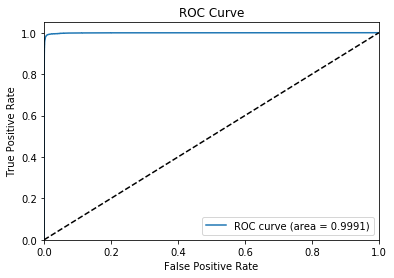

In [37]:
performance(Model=rf1,Y=Y_test,X=X_test)

# Feature importances with forests

In [79]:
feature_importances = pd.DataFrame(rf1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)

In [80]:
feature_importances

,importance
GerpN,0.725849
mamPhCons,0.093076
verPhCons,0.046800
EncodetotalRNA-max,0.027740
Consequence_SYNONYMOUS,0.011665
GerpS,0.008541
priPhyloP,0.007865
Consequence_INTRONIC,0.007384
priPhCons,0.005956
verPhyloP,0.005561


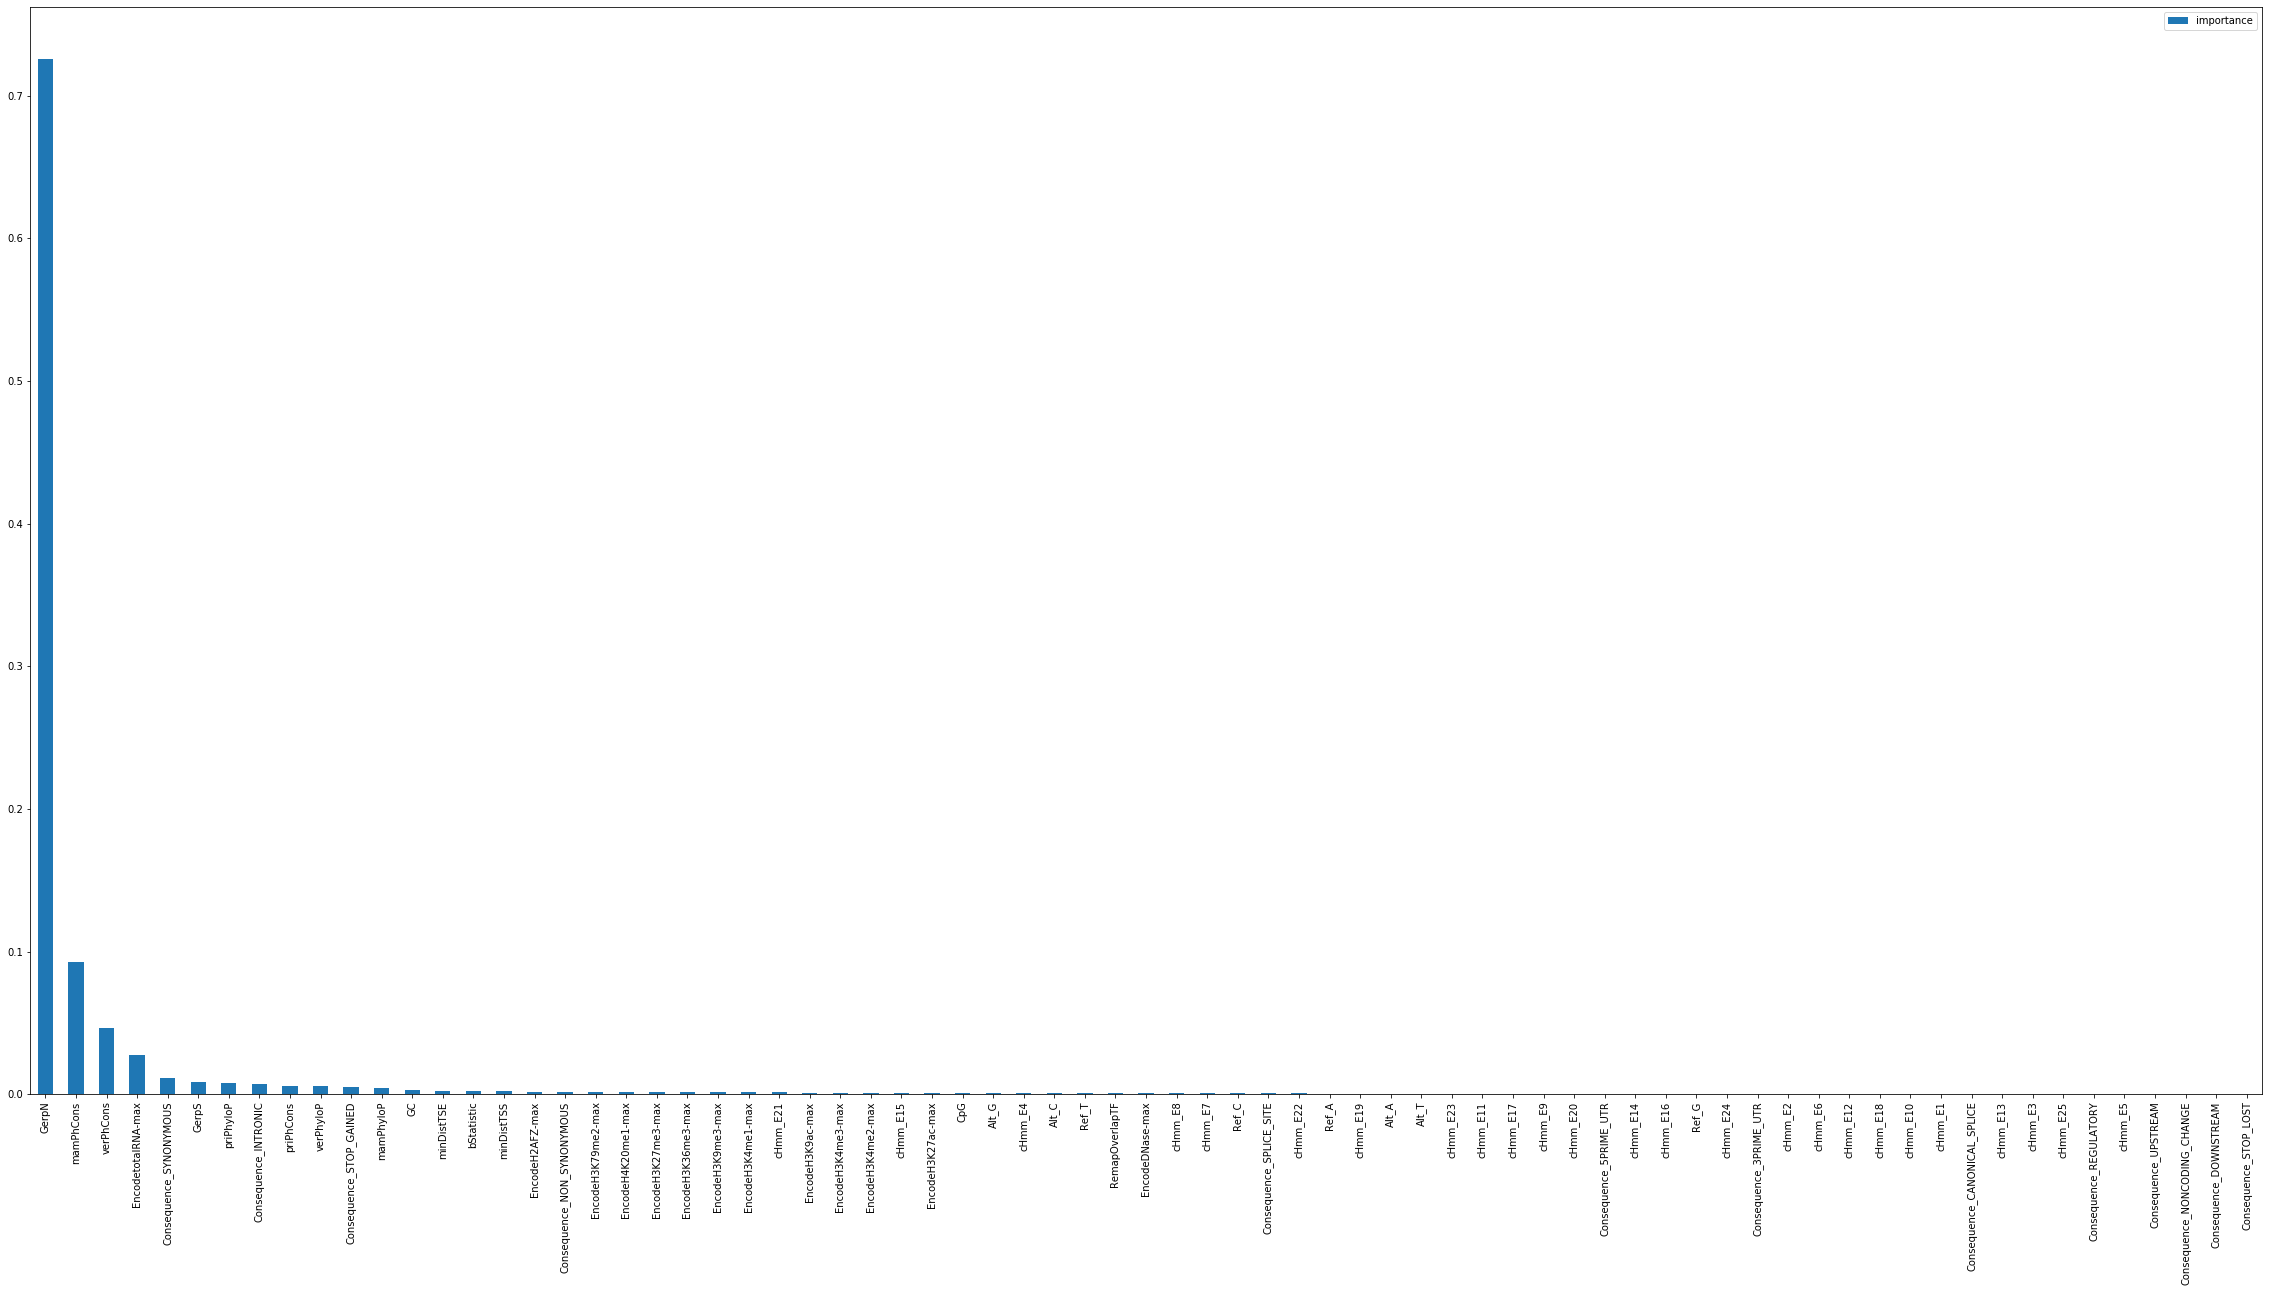

In [89]:
feature_importances.plot(kind='bar',figsize=[ 40, 20])

# matrix evaluation 
https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

# calculating classification accuracy

Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

In [62]:
from sklearn import model_selection

In [63]:
# Separating out the features
X = filtredAttributes.reindex(columns= filtredAttributes.loc[:, filtredAttributes.columns != 'category'].columns , fill_value=0).values
# Separating out the target
Y = filtredAttributes.reindex(columns=['category']).values

#cross validation 
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)


/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [64]:
Y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [38]:

# Cross Validation Classification Accuracy

scoring = 'accuracy'
results = model_selection.cross_val_score(rf1, X, Y, cv=kfold, scoring=scoring)


/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConvers

In [39]:
results.mean()

0.9813147892346187

In [40]:
results.std()

0.0037051882764267937

In [41]:
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

Accuracy: %.3f (%.3f)


TypeError: unsupported operand type(s) for %: 'NoneType' and 'tuple'

# Log Loss

Logistic loss (or log loss) is a performance metric for evaluating the predictions of probabilities of membership to a given class.

The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.

In [65]:

scoring = 'neg_log_loss'
results = model_selection.cross_val_score(rf1, X, Y, cv=model_selection.KFold(n_splits=3, random_state=3), scoring=scoring)



/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


ValueError: y_true contains only one label (1). Please provide the true labels explicitly through the labels argument.

In [ ]:
Y

In [ ]:
results.mean()

In [ ]:
results.std()

In [ ]:
print("Logloss: %.3f (%.3f)") % (results.mean(), results.std())

# Area Under ROC Curve
Area Under ROC Curve (or ROC AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

In [50]:
scoring = 'roc_auc'
results = model_selection.cross_val_score(rf1, X, Y, cv=kfold, scoring=scoring)


/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
results.mean()

In [ ]:
results.std()

In [ ]:
print("AUC: %.3f (%.3f)") % (results.mean(), results.std())

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
predicted = rf1.predict(X_test)

# ROC Curves 
We can plot a ROC curve for a model in Python using the roc_curve() scikit-learn function.

The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds.


A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. The no-skill line changes based on the distribution of the positive to negative classes. It is a horizontal line with the value of the ratio of positive cases in the dataset. For a balanced dataset, this is 0.5.

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.989


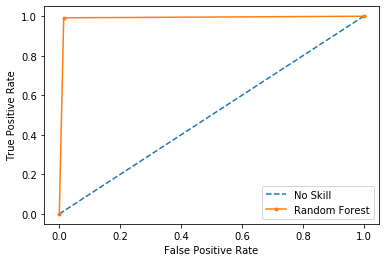

In [69]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]




# keep probabilities for the positive outcome only
#predicted = predicted[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, predicted)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, predicted)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Precision-Recall Curves
Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.
A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.

There are also composite scores that attempt to summarize the precision and recall; two examples include:

F-Measure or F1 score: that calculates the harmonic mean of the precision and recall (harmonic mean because the precision and recall are rates).
Area Under Curve: like the AUC, summarizes the integral or an approximation of the area under the precision-recall curve.
In terms of model selection, F-Measure summarizes model skill for a specific probability threshold (e.g. 0.5), whereas the area under curve summarize the skill of a model across thresholds, like ROC AUC.

In [70]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

Logistic: f1=0.987 auc=0.989


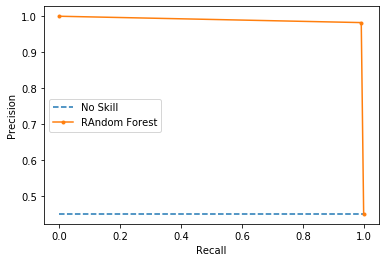

In [71]:
# predict class values
yhat = rf1.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(Y_test, predicted)
lr_f1, lr_auc = f1_score(Y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RAndom Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Confusion Matrix
The confusion matrix is a handy presentation of the accuracy of a model with two or more classes.

The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm.

For example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction=0 and actual=0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0 and actual=1. And so on.

In [72]:
from sklearn.metrics import confusion_matrix
predicted = rf1.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[18784   278]
 [  123 15482]]


# Classification Report
Scikit-learn does provide a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.

The classification_report() function displays the precision, recall, f1-score and support for each class.

In [73]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19062
           1       0.98      0.99      0.99     15605

    accuracy                           0.99     34667
   macro avg       0.99      0.99      0.99     34667
weighted avg       0.99      0.99      0.99     34667



# Mean Absolute Error
The Mean Absolute Error (or MAE) is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were.

The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

In [74]:
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(rf1, X, Y, cv=kfold, scoring=scoring)


/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/narumeena/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConvers

In [75]:
results.mean()

-0.01859145209735008

In [76]:
results.std()

0.003914998143375301

In [77]:
print("MAE: %.3f (%.3f)") % (results.mean(), results.std())

MAE: %.3f (%.3f)


TypeError: unsupported operand type(s) for %: 'NoneType' and 'tuple'

# Mean Squared Error
The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.

Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).

In [ ]:
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(rf1, X, Y, cv=kfold, scoring=scoring)


In [ ]:
results.mean()

In [ ]:
results.std()

In [ ]:
print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

# R^2 Metric
The R^2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination.

This is a value between 0 and 1 for no-fit and perfect fit respectively.

In [ ]:
scoring = 'r2'
results = model_selection.cross_val_score(rf1, X, Y, cv=kfold, scoring=scoring)


In [ ]:
results.mean()

In [ ]:
results.std()

In [ ]:
print("R^2: %.3f (%.3f)") % (results.mean(), results.std())